In [153]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score



In [154]:
# Fetch train_data and test_data from system
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [155]:
#showing train_data of first 20 rows
train_data.head(20)


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [156]:
#showing test_data of first 20 rows

test_data.head(20)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [157]:
# data types of features
print(train_data.dtypes)


id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object


In [158]:
#train data contain any null value or not
train_data.isnull().sum()
# no null value present


id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [159]:
# no null value present

test_data.isnull().sum()


id              0
comment_text    0
dtype: int64

In [160]:
# training data and testing data  having no.s of rows and columns
print(train_data.shape, test_data.shape)


(159571, 8) (153164, 2)


In [161]:
# View few malignant comments
train_data.loc[train_data['malignant']==1]



,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0


In [162]:
#Percentage of unlabelled comments
unlabelled_in_all = train_data[(train_data['malignant']!=1) & (train_data['highly_malignant']!=1) & (train_data['rude']!=1) & 
                            (train_data['threat']!=1) & (train_data['abuse']!=1) & (train_data['loathe']!=1)]
print('Percentage of unlabelled comments is ', len(unlabelled_in_all)/len(train_data)*100)


Percentage of unlabelled comments is  89.83211235124176


In [163]:
# Let's look at the character length for the rows in the training data and record these
train_data['char_length'] = train_data['comment_text'].apply(lambda x: len(str(x)))
train_data['char_length'].head(10)


0    264
1    112
2    233
3    622
4     67
5     65
6     44
7    115
8    472
9     70
Name: char_length, dtype: int64

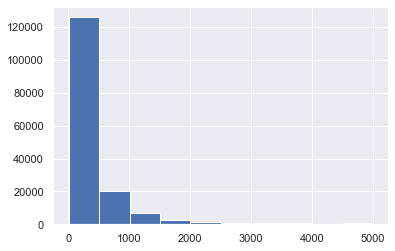

In [164]:
# look at the histogram plot for text length
sns.set()
train_data['char_length'].hist()
plt.show()
#Most of the text length are within 500 characters, with some up to 5,000 characters long.



In [165]:
train_data.head(5)
#new column(char_length) that showing length of comment

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,char_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [166]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']

data = train_data[cols_target]
data.head()


,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


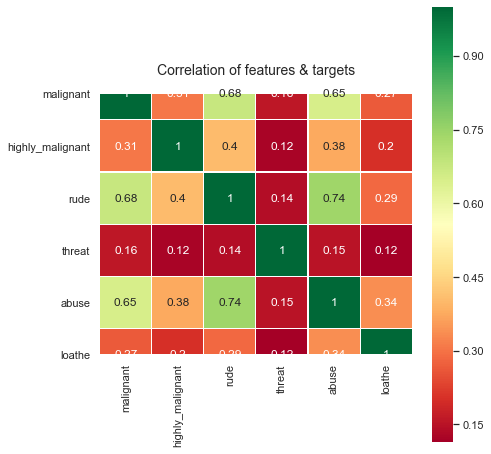

In [167]:
colormap = plt.cm.plasma
plt.figure(figsize=(7,8))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap='RdYlGn',
           linecolor='white',annot=True)

#Indeed, it looks like some of the labels are higher correlated, e.g. rude-abuse has the highest at 0.74, followed by 
#milignant-rude




Text(0.5, 1.0, 'Distribution of malignant Comments')

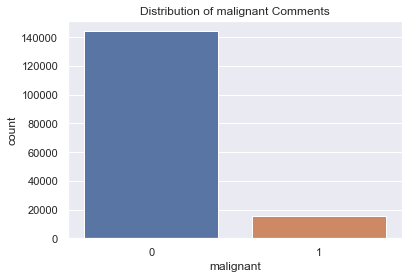

In [168]:
# Plot frequency of malignant comments

sns.countplot(x='malignant',data=train_data)
plt.title('Distribution of malignant Comments')


In [169]:
# total no of malignant comments 
train_data['malignant'].value_counts()


0    144277
1     15294
Name: malignant, dtype: int64

Text(0.5, 1.0, 'Distribution of highly_malignant Comments')

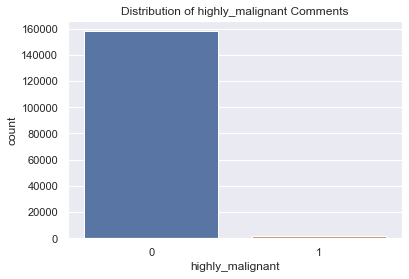

In [170]:
# Plot frequency of highly_malignant comments

sns.countplot(x='highly_malignant',data=train_data)
plt.title('Distribution of highly_malignant Comments')


In [171]:
# total no of highly_malignant comments 
train_data['highly_malignant'].value_counts()


0    157976
1      1595
Name: highly_malignant, dtype: int64

Text(0.5, 1.0, 'Distribution of rude Comments')

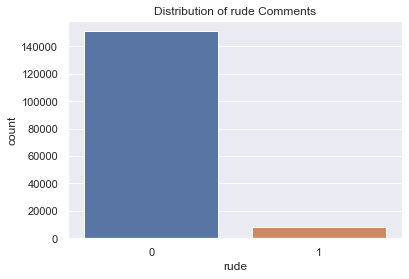

In [172]:
# Plot frequency of rude comments

sns.countplot(x='rude',data=train_data)
plt.title('Distribution of rude Comments')


In [173]:
# total no of rude comments
train_data['rude'].value_counts()


0    151122
1      8449
Name: rude, dtype: int64

Text(0.5, 1.0, 'Distribution of threat Comments')

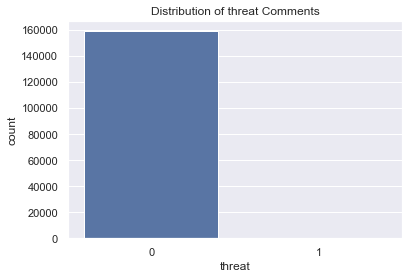

In [174]:
# Plot frequency of threat comments

sns.countplot(x='threat',data=train_data)
plt.title('Distribution of threat Comments')


In [175]:
# total no of threat comments 
train_data['threat'].value_counts()


0    159093
1       478
Name: threat, dtype: int64

Text(0.5, 1.0, 'Distribution of abuse Comments')

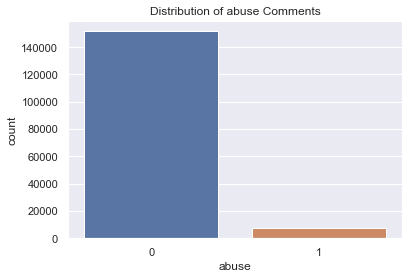

In [176]:
# Plot frequency of abuse comments

sns.countplot(x='abuse',data=train_data)
plt.title('Distribution of abuse Comments')


In [177]:
# total no of abuse comments 
train_data['abuse'].value_counts()


0    151694
1      7877
Name: abuse, dtype: int64

Text(0.5, 1.0, 'Distribution of loathe Comments')

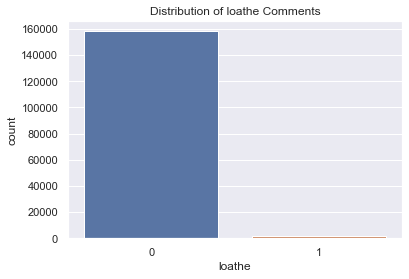

In [178]:
# Plot frequency of loathe comments

sns.countplot(x='loathe',data=train_data)
plt.title('Distribution of loathe Comments')


In [179]:
# total no of loathe comments 
train_data['loathe'].value_counts()


0    158166
1      1405
Name: loathe, dtype: int64

In [180]:
feature_cols = ['comment_text']
label_cols = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
total_cols = feature_cols + label_cols


0    144277
1     15294
Name: malignant, dtype: int64


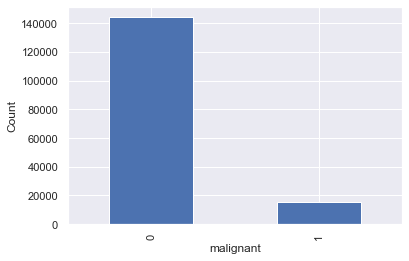

0    157976
1      1595
Name: highly_malignant, dtype: int64


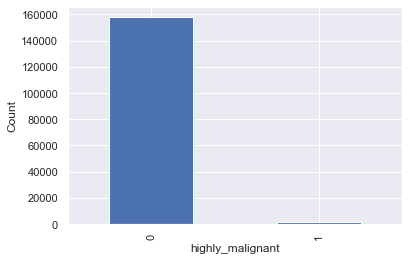

0    151122
1      8449
Name: rude, dtype: int64


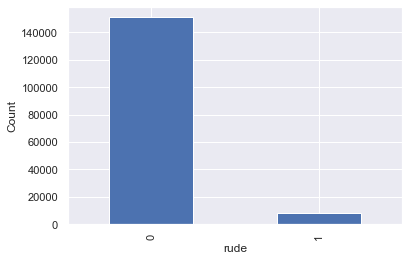

0    159093
1       478
Name: threat, dtype: int64


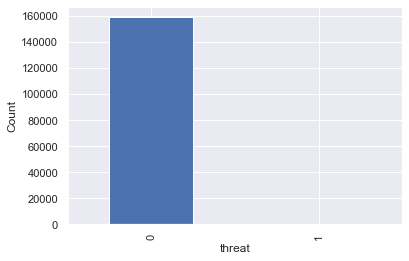

0    151694
1      7877
Name: abuse, dtype: int64


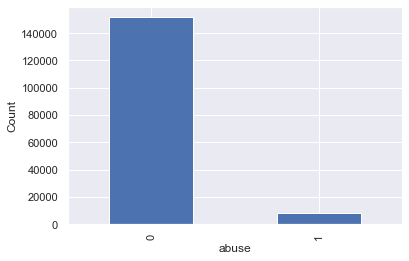

0    158166
1      1405
Name: loathe, dtype: int64


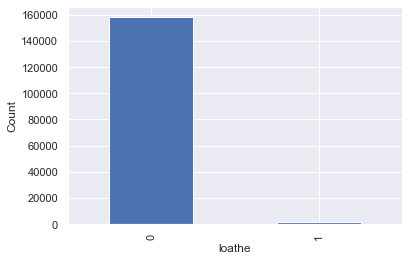

In [181]:
# all labels count using bar graph separately
value_counts_1 = []

for col in label_cols:
    plt.figure(figsize=(6,4))
    train_data[col].value_counts().plot.bar()
    print(train_data[col].value_counts())
    value_counts_1.append( train_data[col].value_counts()[1] )
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


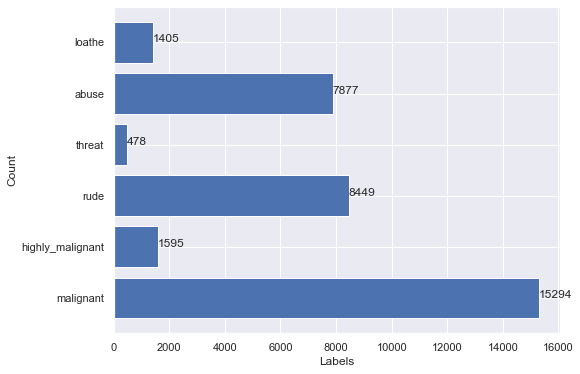

In [182]:
# all labels count in horizontilly
plt.figure(figsize=(8,6))
plt.barh(label_cols, value_counts_1)
plt.xlabel("Labels")
plt.ylabel("Count")
for index, value in enumerate(value_counts_1):
    plt.text(value, index, str(value))


In [183]:
#Let us analyse the average lenght of comments
x = [len(train_data['comment_text'][i]) for i in range(train_data['comment_text'].shape[0])]
print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )


average length of comment: 394.139


# Preprocessing 
Preprocessing involved the following steps, but these will be performed in a slightly different manner:
- Removing Punctuations and other special characters
- Splitting the comments into individual words
- Removing Stop Words
- Stemming and Lemmatising
- Applying Count Vectoriser
- Splitting dataset into Training and Testing

In [184]:
import nltk
from nltk import word_tokenize
import re
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
#stemmer = PorterStemmer("english")
stemmer = SnowballStemmer("english")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [185]:
def removeHTMLTags(input_str):
    regTag = re.compile('<.*?>')
    cleantext = re.sub(regTag, ' ', str(input_str))
    return cleantext


In [186]:
def removePunctChars(input_str):
    processed_str = re.sub(r'[?|!|\'|"|#]',r'',input_str)
    processed_str = re.sub(r'[.|,|)|(|\|/]',r' ',processed_str)
    processed_str = processed_str.strip()
    processed_str = processed_str.replace("\n"," ")
    return processed_str


In [187]:
def removeOtherSpecialChars(input_str):
    modified_str = ""
    for word in input_str.split():
        mod_word = re.sub('[^a-zA-Z ]+', ' ', word)
        modified_str += mod_word 
        modified_str += " "
    return modified_str.strip()


In [220]:
def makeLower(input_str):
    return input_str.lower()


In [189]:
def removeStopWords(input_str):
    modified_str = ""
    for word in input_str.strip().split():
        if word not in stop_words:
            modified_str += word
            modified_str += " "
    return modified_str.strip()


In [190]:
def stemmingWords(input_str):
    modified_str = ""
    for word in input_str.strip().split():
        modified_word = stemmer.stem(word)
        modified_str += modified_word
        modified_str += " "
    return modified_str.strip()


In [191]:
train_data["comment_text"].head(10)


0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
5    "\n\nCongratulations from me as well, use the ...
6         COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
7    Your vandalism to the Matt Shirvington article...
8    Sorry if the word 'nonsense' was offensive to ...
9    alignment on this subject and which are contra...
Name: comment_text, dtype: object

In [192]:
train_data["comment_text"] = train_data["comment_text"].apply(makeLower)
train_data["comment_text"] = train_data["comment_text"].apply(removeHTMLTags)
train_data["comment_text"] = train_data["comment_text"].apply(removePunctChars)
train_data["comment_text"] = train_data["comment_text"].apply(removeOtherSpecialChars)
train_data["comment_text"] = train_data["comment_text"].apply(removeStopWords)


In [193]:
train_data["comment_text"] = train_data["comment_text"].apply(stemmingWords)


In [194]:
train_data["comment_text"].head(20)


0     explan edit made usernam hardcor metallica fan...
1     daww match background colour im seem stuck tha...
2     hey man im realli tri edit war guy constant re...
3     cant make real suggest improv wonder section s...
4                       sir hero chanc rememb page that
5                     congratul well use tool well talk
6                             cocksuck piss around work
7     vandal matt shirvington articl revert pleas do...
8     sorri word nonsens offens anyway im intend wri...
9                      align subject contrari dulithgow
10    fair use rational imag wonju jpg thank upload ...
11                       bbq man let discuss mayb phone
12    hey talk exclus group wp taliban good destroy ...
13    start throw accus warn let review edit make ad...
14    oh girl start argument stuck nose doesnt belon...
15    juelz santana age juelz santana year old came ...
16             bye dont look come think com back tosser
17      redirect talk voydan pop georgiev cherno

In [195]:
test_data["comment_text"] = test_data["comment_text"].apply(makeLower)
test_data["comment_text"] = test_data["comment_text"].apply(removeHTMLTags)
test_data["comment_text"] = test_data["comment_text"].apply(removePunctChars)
test_data["comment_text"] = test_data["comment_text"].apply(removeOtherSpecialChars)
test_data["comment_text"] = test_data["comment_text"].apply(removeStopWords)


In [196]:
test_data["comment_text"] = test_data["comment_text"].apply(stemmingWords)


In [197]:
test_data["comment_text"].head(20)


0     yo bitch ja rule succes youll ever what hate s...
1                                     rfc titl fine imo
2                              sourc zaw ashton lapland
3     look back sourc inform updat correct form gues...
4                               dont anonym edit articl
5     thank understand think high would revert witho...
6     pleas add nonsens wikipedia edit consid vandal...
7                                 dear god site horribl
8     fool believ number correct number lie ponder n...
9     doubl redirect fix doubl redirect dont blank o...
10    think crap link roggenbi articl somebodi know ...
11    somebodi invari tri add religion realli mean w...
12    februari utc look clear ban sockpuppet ignor c...
13    say right type type institut need case three l...
14    ad new product list make sure relev ad new pro...
15    current posit anyon confirm sir alfr longer ai...
16                                                  one
17    reason ban throw articl need section throw

In [198]:
comment_text_length = [len(m_str.split()) for m_str in train_data["comment_text"].tolist()]


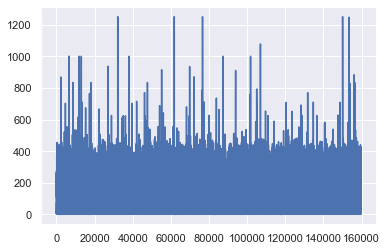

In [199]:
plt.plot(comment_text_length)


In [200]:
print( "Max Length ", max(comment_text_length))
print( "Min Length ", min(comment_text_length))


Max Length  1250
Min Length  0


In [201]:
# convert comments into matrix form 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
cvec = CountVectorizer()
tvec = TfidfTransformer()


In [221]:
# splitting of train_data and test_data
x_train = train_data['comment_text']
y_train = train_data[label_cols]
x_test = test_data['comment_text']
#y_test = test_data[label_cols]

In [203]:
x_train = tvec.fit_transform(cvec.fit_transform(x_train))
x_test = tvec.transform(cvec.transform(x_test))


In [204]:
x_train.shape,x_test.shape

((159571, 136336), (153164, 136336))

In [205]:
accuracies = [[],[],[]]


In [207]:
from sklearn.linear_model import LogisticRegression
scores=[]
for category in label_cols:
    model1 = LogisticRegression(n_jobs=1, solver='liblinear')

    model1.fit(x_train, y_train[category])
        #compute cv score
    cv_score = np.mean(cross_val_score(model1, x_train, y_train[category], cv=3, n_jobs=-1, scoring='roc_auc'))
    scores.append(cv_score)
    #print("CV score for class {} is {}".format(label, cv_score))
    accuracy = model1.score(x_train, y_train[category])
    accuracies[0].append(accuracy)
    print("Accuracy For {0} Class Is {1}%".format(category,round(accuracy*100,2)))
print("Average of accuracies scores: {}".format(np.mean(accuracies[0])))
print("Average CV scores: {}".format(np.mean(scores)))




Accuracy For malignant Class Is 96.22%
Accuracy For highly_malignant Class Is 99.11%
Accuracy For rude Class Is 98.02%
Accuracy For threat Class Is 99.73%
Accuracy For abuse Class Is 97.31%
Accuracy For loathe Class Is 99.25%
Average of accuracies scores: 0.9827109353621063
Average CV scores: 0.9789177202100389


In [209]:
from sklearn.svm import LinearSVC
for category in label_cols:
    model2 = LinearSVC()

    model2.fit(x_train, y_train[category])
        #compute cv score
    cv_score = np.mean(cross_val_score(model2, x_train, y_train[category], cv=3, n_jobs=-1, scoring='roc_auc'))
    scores.append(cv_score)
    #print("CV score for class {} is {}".format(label, cv_score))
    accuracy = model2.score(x_train, y_train[category])
    accuracies[1].append(accuracy)
    print("Accuracy For {0} Class Is {1}%".format(category,round(accuracy*100,2)))
print("Average of accuracies scores: {}".format(np.mean(accuracies[1])))
print("Average CV scores: {}".format(np.mean(scores)))


Accuracy For malignant Class Is 98.12%
Accuracy For highly_malignant Class Is 99.52%
Accuracy For rude Class Is 99.17%
Accuracy For threat Class Is 99.9%
Accuracy For abuse Class Is 98.7%
Accuracy For loathe Class Is 99.67%
Average of accuracies scores: 0.9918019773851974
Average CV scores: 0.9756701542601239


In [210]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()
for category in label_cols:
    model3 = MultinomialNB()

    model3.fit(x_train, y_train[category])
        #compute cv score
    cv_score = np.mean(cross_val_score(model3, x_train, y_train[category], cv=3, n_jobs=-1, scoring='roc_auc'))
    scores.append(cv_score)
    #print("CV score for class {} is {}".format(label, cv_score))
    accuracy = model3.score(x_train, y_train[category])
    accuracies[2].append(accuracy)
    print("Accuracy For {0} Class Is {1}%".format(category,round(accuracy*100,2)))
print("Average of accuracies scores: {}".format(np.mean(accuracies[2])))
print("Average CV scores: {}".format(np.mean(scores)))



Accuracy For malignant Class Is 92.83%
Accuracy For highly_malignant Class Is 98.99%
Accuracy For rude Class Is 95.61%
Accuracy For threat Class Is 99.7%
Accuracy For abuse Class Is 95.49%
Accuracy For loathe Class Is 99.11%
Average of accuracies scores: 0.9695527382795119
Average CV scores: 0.9407326621130517


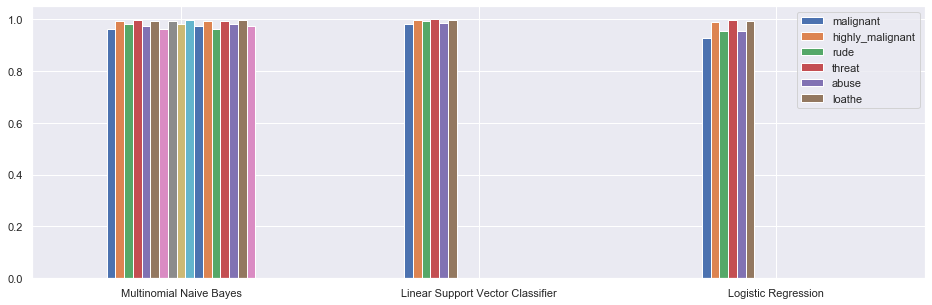

In [212]:
accuracies = pd.DataFrame(accuracies)
fig = accuracies.plot.bar(figsize=(16, 5), grid=True)
plt.xticks(np.arange(3),('Multinomial Naive Bayes','Linear Support Vector Classifier','Logistic Regression'),rotation=0)
plt.legend(label_cols)
plt.show()


In [215]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

def evaluate_score(y_test,x_test): 
    loss = hamming_loss(y_test,x_test)
    print("Hamming_loss : {}".format(loss*100))
    accuracy = accuracy_score(y_test,x_test)
    print("Accuracy : {}".format(accuracy*100))
    try : 
        loss = log_loss(y_test,x_test)
    except :
        loss = log_loss(y_test,x_test.toarray())
    print("Log_loss : {}".format(loss))